In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#

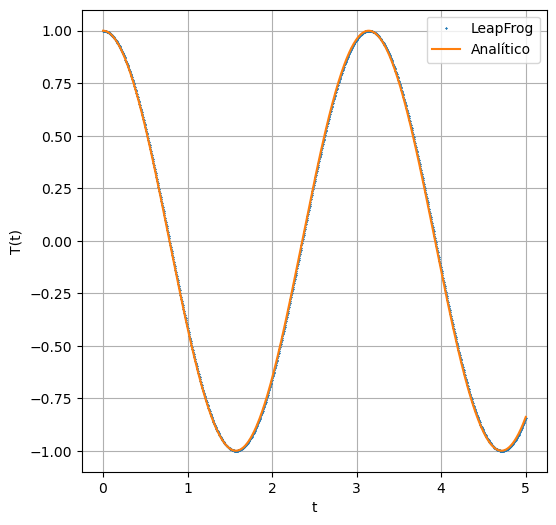

<Figure size 640x480 with 0 Axes>

In [3]:
# Leapfrog: Oscilador harmônico

omega2 = 4
def f(x):
    return -omega2*x


n_pontos = 1000
t = np.linspace(0,5,n_pontos)
delta_t = 5.0/n_pontos
x_0 = 1
v_0 = 0

x = [x_0]
v = [v_0]

for i in range(len(t)-1):
    
    y = x[i] +  delta_t * v[i] + 0.5 * f(x[i]) * delta_t**2
    x.append(y)
    
    y = v[i] + 0.5 * (f(x[i]) + f(x[i+1])) * delta_t              # x[i] -----> x[i+1] para usar Euler-Cramer
    v.append(y)
    



plt.figure(figsize=(6, 6))     
    
plt.xlabel("t")
plt.ylabel("T(t)")
plt.plot(t, x, 'x', markersize=1, label='LeapFrog')
plt.plot(t, np.cos(math.sqrt(omega2)*t), '-', markersize=2, label='Analítico')

plt.grid()
plt.legend(loc="upper right")
plt.show()
plt.clf()





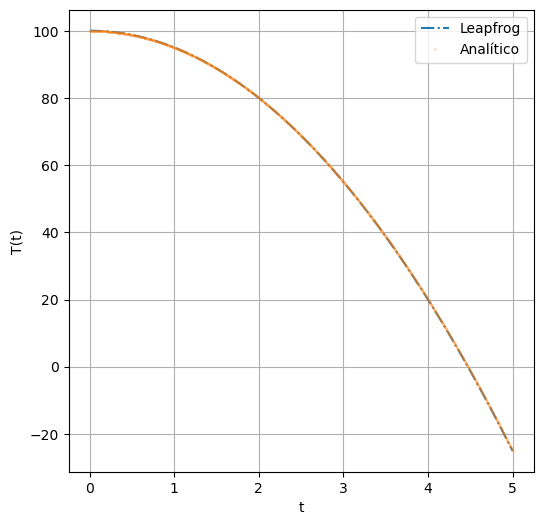

<Figure size 640x480 with 0 Axes>

In [4]:
# LeapFrog: Lançamento oblíquo

g = 10

def fx(x,y):
    return 0

def fy(x,y):
    return -g


n_pontos = 1000
t = np.linspace(0,5,n_pontos)
delta_t = 5.0/(n_pontos-1)
x_0 = 0
y_0 = 100

v0_x = 1
v0_y = 0

x = [x_0]
y = [y_0]

v_x = [v0_x]
v_y = [v0_y]

for i in range(len(t)-1):
    
    s = x[i] +  delta_t * v_x[i] + 0.5 * fx(x[i],y[i]) * delta_t**2
    x.append(s)
    
    s = y[i] +  delta_t * v_y[i] + 0.5 * fy(x[i],y[i]) * delta_t**2
    y.append(s)
    
    s = v_x[i] + 0.5 * (fx(x[i],y[i]) + fx(x[i+1],y[i+1])) * delta_t
    v_x.append(s)
    
    s = v_y[i] + 0.5 * (fy(x[i],y[i]) + fy(x[i+1],y[i+1])) * delta_t
    v_y.append(s)

    
    
    
plt.figure(figsize=(6, 6))     
    
plt.xlabel("t")
plt.ylabel("T(t)")
plt.plot(x, y, '-.', markersize=1, label='Leapfrog')
plt.plot(v0_x*t, -g*t**2/2 + y_0, '.', markersize=0.5, label='Analítico')

plt.grid()
plt.legend(loc="upper right")
plt.show()
plt.clf()

x_obliquo = x
y_obliquo = y


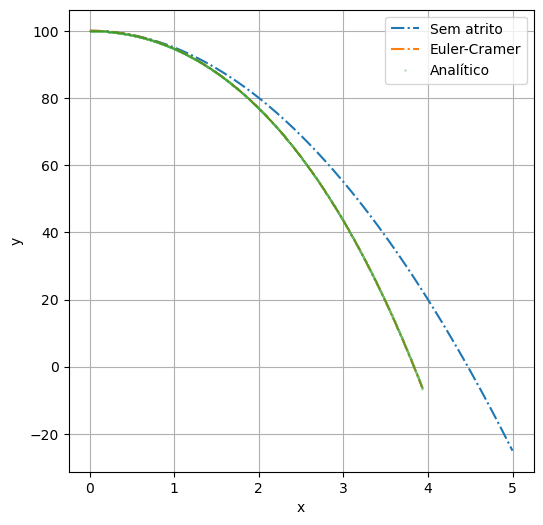

<Figure size 640x480 with 0 Axes>

In [8]:
# Euler: Lançamento oblíquo

g = 10
k = 0.1

def fx(v_x):
    return -k*v_x

def fy(v_y):
    return -g-k*v_y


n_pontos = 1000
t_final = 5.
t = np.linspace(0,t_final,n_pontos)
delta_t = t_final/n_pontos
x_0 = 0
y_0 = 100

v0_x = 1
v0_y = 0

x = [x_0]
y = [y_0]

v_x = [v0_x]
v_y = [v0_y]

for i in range(len(t)-1):
    
    s = x[i] +  delta_t * v_x[i]
    x.append(s)

    s = y[i] +  delta_t * v_y[i]
    y.append(s)
    
    s = v_x[i] + delta_t * fx(v_x[i])              # x[i] -----> x[i+1] para usar Euler-Cramer
    v_x.append(s)
    
    s = v_y[i] + delta_t * fy(v_y[i])               # x[i] -----> x[i+1] para usar Euler-Cramer
    v_y.append(s)
    
    
    
plt.figure(figsize=(6, 6))     
    
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_obliquo, y_obliquo, '-.', markersize=1, label='Sem atrito')
plt.plot(x, y, '-.', markersize=1, label='Euler-Cramer')
plt.plot(x_0+v0_x*(1-np.exp(-k*t))/k, y_0-g*t/k+(v0_y+g/k)*(1-np.exp(-k*t))/k, '.', markersize=0.5, label='Analítico')


plt.grid()
plt.legend(loc="upper right")
plt.show()
plt.clf()

x_linear = x
y_linear = y


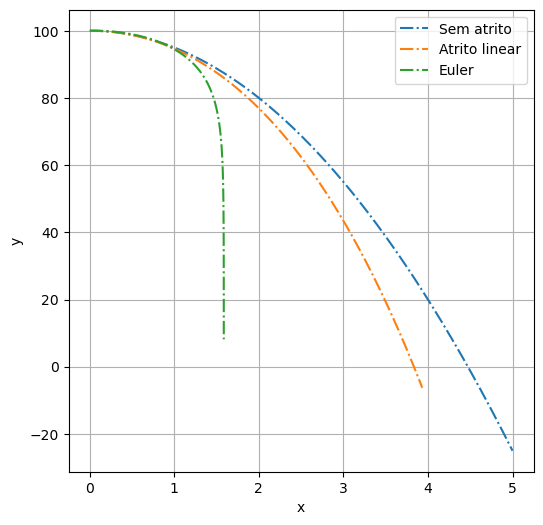

<Figure size 640x480 with 0 Axes>

In [9]:
# Euler: Exemplo 4, lançamento oblíquo com atrito quadrático

g = 10
k = 0.1

def fx(vx,vy):
    return -k*vx*math.sqrt(vx**2+vy**2)

def fy(vx,vy):
    return -g-k*vy*math.sqrt(vx**2+vy**2)


n_pontos = 100
t_final = 10.
t = np.linspace(0,t_final,n_pontos)
delta_t = t_final/n_pontos
x_0 = 0
y_0 = 100

v0_x = 1
v0_y = 0

x = [x_0]
y = [y_0]

v_x = [v0_x]
v_y = [v0_y]

for i in range(len(t)-1):
    
    s = x[i] +  delta_t * v_x[i]
    x.append(s)

    s = y[i] +  delta_t * v_y[i]
    y.append(s)
    
    v = v_x[i] + v_y[i]
    
    s = v_x[i] + delta_t * fx(v_x[i],v_y[i])              # x[i] -----> x[i+1] para usar Euler-Cramer
    v_x.append(s)
    
    s = v_y[i] + delta_t * fy(v_x[i],v_y[i])               # x[i] -----> x[i+1] para usar Euler-Cramer
    v_y.append(s)
    
    
    
plt.figure(figsize=(6, 6))     
    
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_obliquo, y_obliquo, '-.', markersize=1, label='Sem atrito')
plt.plot(x_linear, y_linear, '-.', markersize=1, label='Atrito linear')
plt.plot(x, y, '-.', markersize=1, label='Euler')

plt.grid()
plt.legend(loc="upper right")
plt.show()
plt.clf()

x_quadratico = x
y_quadratico = y


In [11]:
# Euler: Gravitação clássica de dois corpos

m1 = 1
m2 = 1
G = 1

def grav_force(x1, x2):
    r = [x2[0] - x1[0], x2[1] - x1[1]]
    r = math.sqrt(r[0]**2 + r[1]**2) 
    print(r)
    F1 = [- G*m1*m2/r**3 * (x1[0]-x2[0]), - G*m1*m2/r**3 * (x1[1]-x2[1])]
    F2 = [- G*m1*m2/r**3 * (x2[0]-x1[0]), - G*m1*m2/r**3 * (x2[1]-x1[1])]

    return F1, F2


x1 = [[0, 0]]         # Primeira posição x e segunda y
v1 = [[0, 0]]         # Primeira velocidade x e segunda velocidade y

x2 = [[1, 0]]         
v2 = [[0, 0]]

F = grav_force(x1[0], x2[0])

print(F[0])


1.0
[1.0, -0.0]


In [14]:
n_pontos = 10000
t_final = 10.
t = np.linspace(0,t_final,n_pontos)
delta_t = t_final/(n_pontos-1)


x_0 = 0
y_0 = 100

x = [ x1, x2 ]
v = [ v1, v2 ]

for i in range(len(t)-1):
    
    # Primeiro corpo

    s = [x1[i] +  delta_t * v_x[i], x1[i] +  delta_t * v_y[i]]
    x.append(s)

    s = y[i] +  delta_t * v_y[i]
    y.append(s)
    
    v = v_x[i] + v_y[i]
    
    s = v_x[i] + delta_t * fx(v_x[i],v_y[i])              # x[i] -----> x[i+1] para usar Euler-Cramer
    v_x.append(s)
    
    s = v_y[i] + delta_t * fy(v_x[i],v_y[i])               # x[i] -----> x[i+1] para usar Euler-Cramer
    v_y.append(s)

    # Segundo corpo
    

TypeError: can only concatenate list (not "float") to list

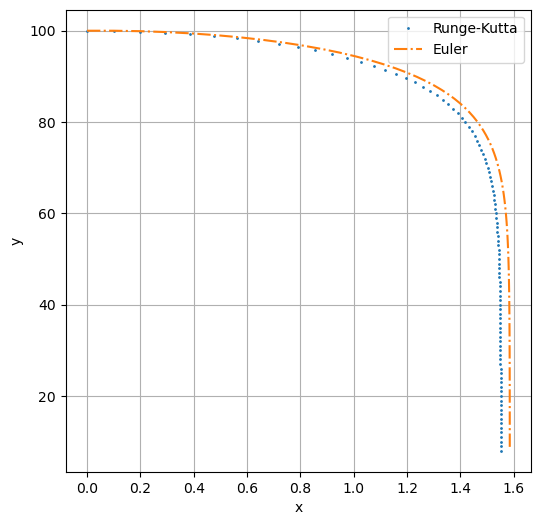

<Figure size 640x480 with 0 Axes>

In [15]:
# Runge-Kutta exemplo 1: Lançamento com arrasto quadrático e comparação com solução Euler

g = 10
k = 0.1

def fx(vx,vy):
    return -k*vx*math.sqrt(vx**2+vy**2)

def fy(vx,vy):
    return -g-k*vy*math.sqrt(vx**2+vy**2)


n_pontos = 100
t_final = 10.
t = np.linspace(0,t_final,n_pontos)
delta_t = t_final/n_pontos
x_0 = 0
y_0 = 100

v0_x = 1
v0_y = 0

x = [x_0]
y = [y_0]

v_x = [v0_x]
v_y = [v0_y]

for i in range(len(t)-1):
    
    F1 = [ v_x[i] , v_y[i] , fx(v_x[i],v_y[i]) , fy(v_x[i],v_y[i]) ]
    
    vx = 0.5*delta_t*F1[2]+v_x[i]
    vy = 0.5*delta_t*F1[3]+v_y[i]
    F2 = [ vx , vy , fx(vx,vy) , fy(vx,vy) ]
    
    vx = 0.5*delta_t*F2[2]+v_x[i]
    vy = 0.5*delta_t*F2[3]+v_y[i]
    F3 = [ vx , vy , fx(vx,vy) , fy(vx,vy) ]
    
    vx = delta_t*F3[2]+v_x[i]
    vy = delta_t*F3[3]+v_y[i]
    F4 = [ vx , vy , fx(vx,vy) , fy(vx,vy) ]
    
    
    
    s = x[i] +  delta_t * (F1[0]+2*F2[0]+2*F3[0]+F4[0]) / 6
    x.append(s)

    s = y[i] +  delta_t * (F1[1]+2*F2[1]+2*F3[1]+F4[1]) / 6
    y.append(s)
    
    s = v_x[i] + delta_t * (F1[2]+2*F2[2]+2*F3[2]+F4[2]) / 6              # x[i] -----> x[i+1] para usar Euler-Cramer
    v_x.append(s)
    
    s = v_y[i] + delta_t * (F1[3]+2*F2[3]+2*F3[3]+F4[3]) / 6              # x[i] -----> x[i+1] para usar Euler-Cramer
    v_y.append(s)
    
    
    
plt.figure(figsize=(6, 6))     
    
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y, '.', markersize=2, label='Runge-Kutta')
plt.plot(x_quadratico, y_quadratico, '-.', markersize=2, label='Euler')

plt.grid()
plt.legend(loc="upper right")
plt.show()
plt.clf()


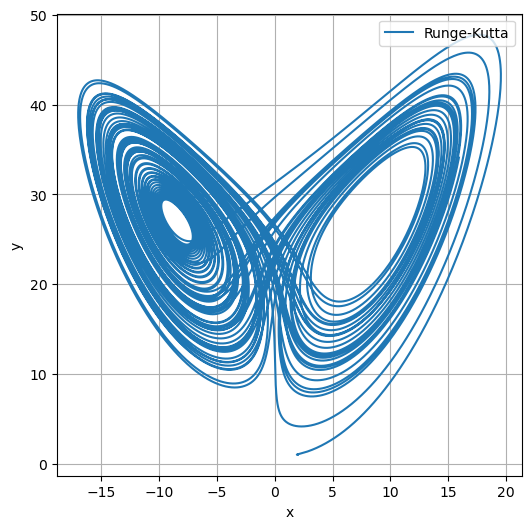

<Figure size 640x480 with 0 Axes>

In [16]:
# Runge-Kutta exemplo 2: Sistema de Lorenz


sigma = 10
rho = 28
beta = 8/3

def lorenz_system(x, y, z):
    dx = sigma*(y-x)
    dy = x*(rho-z)-y
    dz = x*y-beta*z
    return [dx, dy, dz]

n_pontos = 60000
t_final = 60.
t = np.linspace(0,t_final,n_pontos)
delta_t = t_final/n_pontos
x_0 = 2
y_0 = 1
z_0 = 1


x = [x_0]
y = [y_0]
z = [z_0]


for i in range(len(t)-1):

    dx = lorenz_system(x[i], y[i], z[i])
    F1 = [ dx[0] , dx[1] , dx[2] ]
    
    x_ = 0.5*delta_t*F1[0]+x[i]
    y_ = 0.5*delta_t*F1[1]+y[i]
    z_ = 0.5*delta_t*F1[2]+z[i]
    dx = lorenz_system(x_, y_, z_)
    F2 = [ dx[0] , dx[1] , dx[2] ]
    
    x_ = 0.5*delta_t*F2[0]+x[i]
    y_ = 0.5*delta_t*F2[1]+y[i]
    z_ = 0.5*delta_t*F2[2]+z[i]
    dx = lorenz_system(x_, y_, z_)
    F3 = [ dx[0] , dx[1] , dx[2] ]
    
    x_ = delta_t*F3[0]+x[i]
    y_ = delta_t*F3[1]+y[i]
    z_ = delta_t*F3[2]+z[i]
    dx = lorenz_system(x_, y_, z_)
    F4 = [ dx[0] , dx[1] , dx[2] ]
    
    
    
    s = x[i] +  delta_t * (F1[0]+2*F2[0]+2*F3[0]+F4[0]) / 6
    x.append(s)

    s = y[i] +  delta_t * (F1[1]+2*F2[1]+2*F3[1]+F4[1]) / 6
    y.append(s)
    
    s = z[i] +  delta_t * (F1[2]+2*F2[2]+2*F3[2]+F4[2]) / 6
    z.append(s)

    
    
    
plt.figure(figsize=(6, 6))     
    
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, z, '-', markersize=0.3, label='Runge-Kutta')

plt.grid()
plt.legend(loc="upper right")
plt.show()
plt.clf()

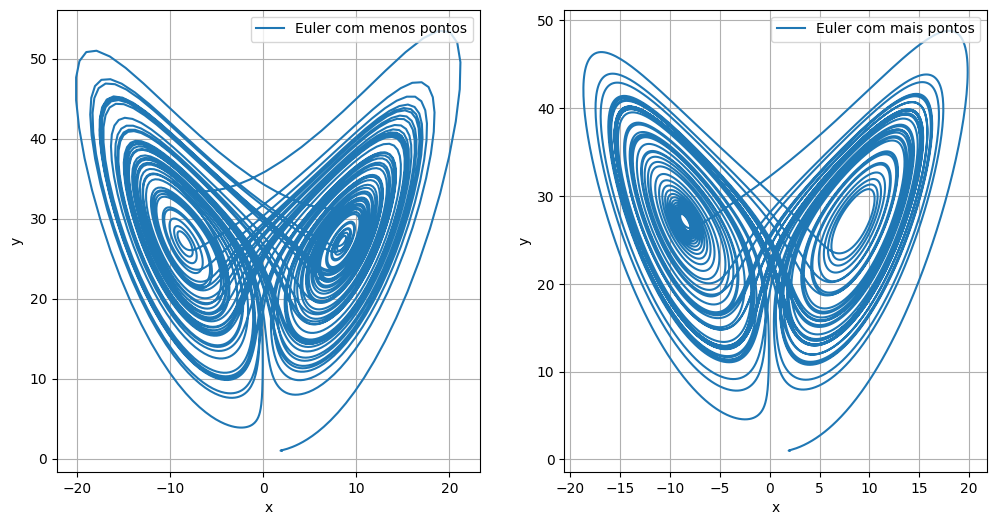

<Figure size 640x480 with 0 Axes>

In [57]:
# Sistema de Lorenz por Euler com diferentes números de pontos

fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 linha, 2 colunas

n_pontos = 6000
t_final = 60.
t = np.linspace(0,t_final,n_pontos)
delta_t = t_final/n_pontos
x_0 = 2
y_0 = 1
z_0 = 1


x = [x_0]
y = [y_0]
z = [z_0]


for i in range(len(t)-1):

    dx = lorenz_system(x[i], y[i], z[i])
    
    s = x[i] +  delta_t * dx[0]
    x.append(s)

    s = y[i] +  delta_t * dx[1]
    y.append(s)
    
    s = z[i] +  delta_t * dx[2]
    z.append(s)

    

axs[0].plot(x, z, '-', markersize=1, label='Euler com menos pontos')
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].grid()
axs[0].legend(loc="upper right")



n_pontos = 30000
t_final = 60.
t = np.linspace(0,t_final,n_pontos)
delta_t = t_final/n_pontos
x_0 = 2
y_0 = 1
z_0 = 1


x = [x_0]
y = [y_0]
z = [z_0]


for i in range(len(t)-1):

    dx = lorenz_system(x[i], y[i], z[i])
    
    s = x[i] +  delta_t * dx[0]
    x.append(s)

    s = y[i] +  delta_t * dx[1]
    y.append(s)
    
    s = z[i] +  delta_t * dx[2]
    z.append(s)

    

axs[1].plot(x, z, '-', markersize=1, label='Euler com mais pontos')
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
axs[1].grid()
axs[1].legend(loc="upper right")

plt.show()
plt.clf()

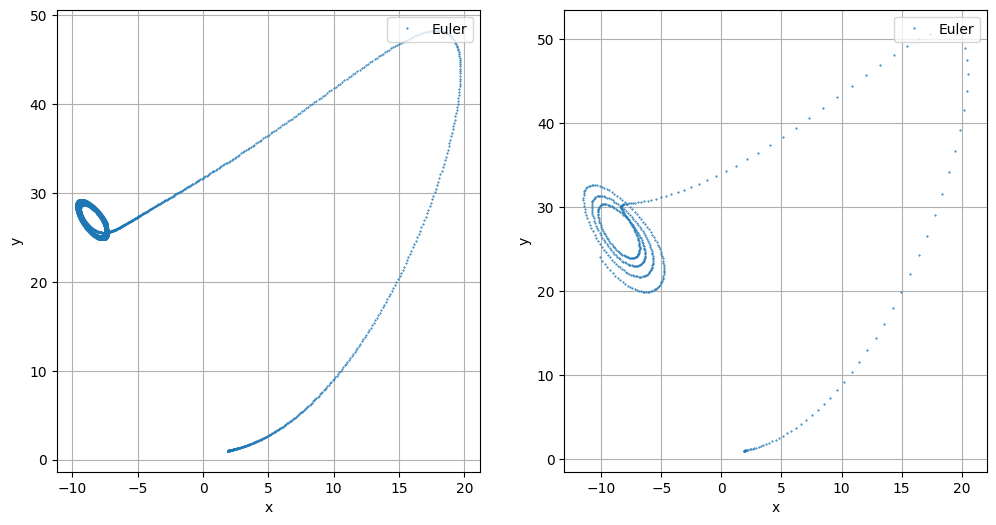

<Figure size 640x480 with 0 Axes>

In [58]:
# Sistema de Lorenz por Euler com diferentes números de pontos em uma trajetória menor

fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 linha, 2 colunas

n_pontos = 3000
t_final = 3.
t = np.linspace(0,t_final,n_pontos)
delta_t = t_final/n_pontos
x_0 = 2
y_0 = 1
z_0 = 1


x = [x_0]
y = [y_0]
z = [z_0]


for i in range(len(t)-1):

    dx = lorenz_system(x[i], y[i], z[i])
    
    s = x[i] +  delta_t * dx[0]
    x.append(s)

    s = y[i] +  delta_t * dx[1]
    y.append(s)
    
    s = z[i] +  delta_t * dx[2]
    z.append(s)

    

axs[0].plot(x, z, '.', markersize=1, label='Euler')
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].grid()
axs[0].legend(loc="upper right")



n_pontos = 500
t_final = 3.
t = np.linspace(0,t_final,n_pontos)
delta_t = t_final/n_pontos
x_0 = 2
y_0 = 1
z_0 = 1


x = [x_0]
y = [y_0]
z = [z_0]


for i in range(len(t)-1):

    dx = lorenz_system(x[i], y[i], z[i])
    
    s = x[i] +  delta_t * dx[0]
    x.append(s)

    s = y[i] +  delta_t * dx[1]
    y.append(s)
    
    s = z[i] +  delta_t * dx[2]
    z.append(s)

    

axs[1].plot(x, z, '.', markersize=1, label='Euler')
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
axs[1].grid()
axs[1].legend(loc="upper right")

plt.show()
plt.clf()

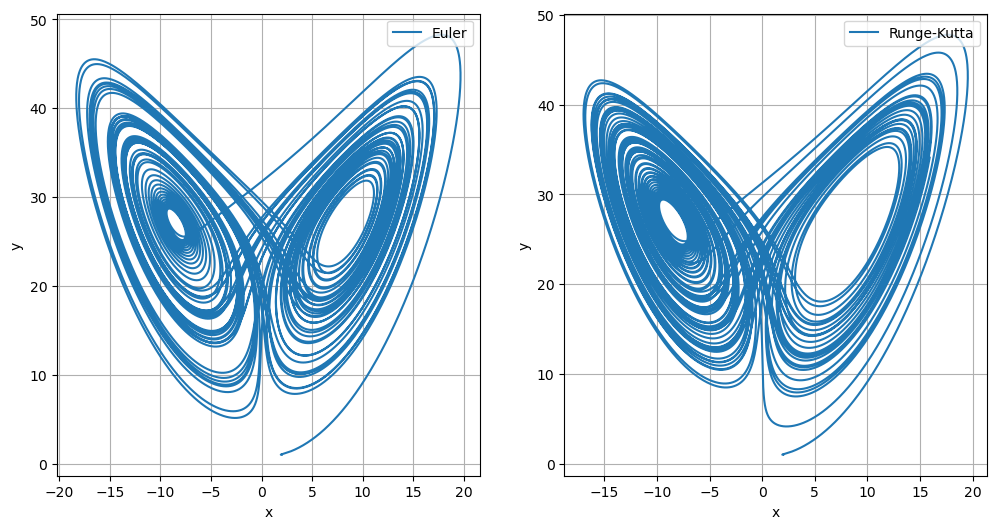

<Figure size 640x480 with 0 Axes>

In [17]:
# Sistema de Lorenz por Euler e Runge-Kutta

fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 linha, 2 colunas

n_pontos = 60000
t_final = 60.
t = np.linspace(0,t_final,n_pontos)
delta_t = t_final/n_pontos
x_0 = 2
y_0 = 1
z_0 = 1


x = [x_0]
y = [y_0]
z = [z_0]


for i in range(len(t)-1):

    dx = lorenz_system(x[i], y[i], z[i])
    
    s = x[i] +  delta_t * dx[0]
    x.append(s)

    s = y[i] +  delta_t * dx[1]
    y.append(s)
    
    s = z[i] +  delta_t * dx[2]
    z.append(s)

    

axs[0].plot(x, z, '-', markersize=1, label='Euler')
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].grid()
axs[0].legend(loc="upper right")



n_pontos = 60000
t_final = 60.
t = np.linspace(0,t_final,n_pontos)
delta_t = t_final/n_pontos
x_0 = 2
y_0 = 1
z_0 = 1


x = [x_0]
y = [y_0]
z = [z_0]

for i in range(len(t)-1):

    dx = lorenz_system(x[i], y[i], z[i])
    F1 = [ dx[0] , dx[1] , dx[2] ]
    
    x_ = 0.5*delta_t*F1[0]+x[i]
    y_ = 0.5*delta_t*F1[1]+y[i]
    z_ = 0.5*delta_t*F1[2]+z[i]
    dx = lorenz_system(x_, y_, z_)
    F2 = [ dx[0] , dx[1] , dx[2] ]
    
    x_ = 0.5*delta_t*F2[0]+x[i]
    y_ = 0.5*delta_t*F2[1]+y[i]
    z_ = 0.5*delta_t*F2[2]+z[i]
    dx = lorenz_system(x_, y_, z_)
    F3 = [ dx[0] , dx[1] , dx[2] ]
    
    x_ = delta_t*F3[0]+x[i]
    y_ = delta_t*F3[1]+y[i]
    z_ = delta_t*F3[2]+z[i]
    dx = lorenz_system(x_, y_, z_)
    F4 = [ dx[0] , dx[1] , dx[2] ]
    
    
    
    s = x[i] +  delta_t * (F1[0]+2*F2[0]+2*F3[0]+F4[0]) / 6
    x.append(s)

    s = y[i] +  delta_t * (F1[1]+2*F2[1]+2*F3[1]+F4[1]) / 6
    y.append(s)
    
    s = z[i] +  delta_t * (F1[2]+2*F2[2]+2*F3[2]+F4[2]) / 6
    z.append(s)

    

axs[1].plot(x, z, '-', markersize=1, label='Runge-Kutta')
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
axs[1].grid()
axs[1].legend(loc="upper right")

plt.show()
plt.clf()

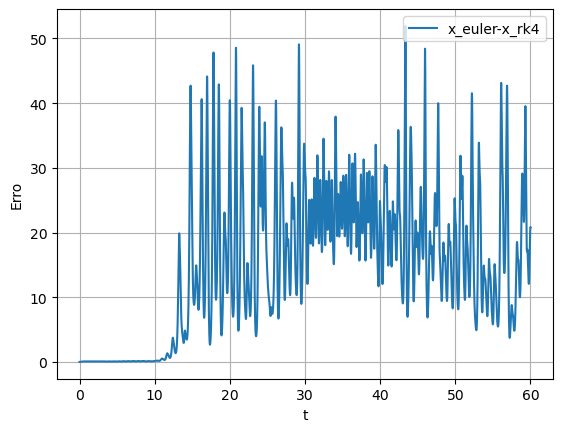

<Figure size 640x480 with 0 Axes>

In [18]:
# Diferença de trajetórias entre Euler e Runge-Kutta

n_pontos = 600000
t_final = 60.
t = np.linspace(0,t_final,n_pontos)
delta_t = t_final/n_pontos
x_0 = 2
y_0 = 1
z_0 = 1


x = [x_0]
y = [y_0]
z = [z_0]


for i in range(len(t)-1):

    dx = lorenz_system(x[i], y[i], z[i])
    
    s = x[i] +  delta_t * dx[0]
    x.append(s)

    s = y[i] +  delta_t * dx[1]
    y.append(s)
    
    s = z[i] +  delta_t * dx[2]
    z.append(s)

x = np.array(x)
y = np.array(y)
z = np.array(z)

x = np.reshape(x, (len(x), 1))
y = np.reshape(y, (len(y), 1))
z = np.reshape(z, (len(z), 1))

x_euler = np.concatenate((x, y), axis=1)
x_euler = np.concatenate((x_euler, z), axis=1)


n_pontos = 600000
t_final = 60.
t = np.linspace(0,t_final,n_pontos)
delta_t = t_final/n_pontos
x_0 = 2
y_0 = 1
z_0 = 1


x = [x_0]
y = [y_0]
z = [z_0]

for i in range(len(t)-1):

    dx = lorenz_system(x[i], y[i], z[i])
    F1 = [ dx[0] , dx[1] , dx[2] ]
    
    x_ = 0.5*delta_t*F1[0]+x[i]
    y_ = 0.5*delta_t*F1[1]+y[i]
    z_ = 0.5*delta_t*F1[2]+z[i]
    dx = lorenz_system(x_, y_, z_)
    F2 = [ dx[0] , dx[1] , dx[2] ]
    
    x_ = 0.5*delta_t*F2[0]+x[i]
    y_ = 0.5*delta_t*F2[1]+y[i]
    z_ = 0.5*delta_t*F2[2]+z[i]
    dx = lorenz_system(x_, y_, z_)
    F3 = [ dx[0] , dx[1] , dx[2] ]
    
    x_ = delta_t*F3[0]+x[i]
    y_ = delta_t*F3[1]+y[i]
    z_ = delta_t*F3[2]+z[i]
    dx = lorenz_system(x_, y_, z_)
    F4 = [ dx[0] , dx[1] , dx[2] ]
    
    
    
    s = x[i] +  delta_t * (F1[0]+2*F2[0]+2*F3[0]+F4[0]) / 6
    x.append(s)

    s = y[i] +  delta_t * (F1[1]+2*F2[1]+2*F3[1]+F4[1]) / 6
    y.append(s)
    
    s = z[i] +  delta_t * (F1[2]+2*F2[2]+2*F3[2]+F4[2]) / 6
    z.append(s)

x = np.array(x)
y = np.array(y)
z = np.array(z)

x = np.reshape(x, (len(x), 1))
y = np.reshape(y, (len(y), 1))
z = np.reshape(z, (len(z), 1))

x_rk4 = np.concatenate((x, y), axis=1)
x_rk4 = np.concatenate((x_rk4, z), axis=1)

x_dif = np.abs(x_euler - x_rk4)
x_dif = np.sqrt(x_dif[:,0]**2 + x_dif[:,1]**2 + x_dif[:,2]**2)


plt.plot(t, x_dif, '-', markersize=1, label='x_euler-x_rk4')
plt.xlabel("t")
plt.ylabel("Erro")
plt.grid()
plt.legend(loc="upper right")

plt.show()
plt.clf()